# Getting Started

---

Getting started with image processing is straightforward. There's three classes of operations in `phenotypic`: `ImageOperation`, `MeasureFeature`, and `ImagePipeline`.

`ImageOperation`(s) are processes that operate on the data of an image in preparation for feature extraction with `MeasureFeature`. `ImagePipeline`(s) are a collection of operations and measurements compiled into a single class for convenience. To get started with `phenotypic`, it's fastest to start by using one of the pipeines in `phenotypic.prefab`. Below we use `phenotypic.prefab.HeavyWatershedPipeline`, which was used with hand scanner images of *Kluveromyces Marxianus*.

In [1]:
import phenotypic as pht

filepaths = [x for x in
             pht.data.yield_sample_dataset(mode='filepath')]  # This returns the filepaths for this sample data
filepaths


[PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_6.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_7.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/2_1S_8.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_6.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_7.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/3_1S_8.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/4_1S_5.jpg'),
 PosixPath('/Users/alex/Projects/PhenoTypic/src/phenotypic/data/PhenoTypicSampleSubset/4_1S

## Processing your first image

---
Here we're gonna import our first image, and the image contains a 96 array format. Accepted file formats are jpegs, tiffs, pngs, and RAW files.

/var/folders/78/rnctrlmn5kj996kjnq_mmqlh0000gn/T/ipykernel_33978/2138559655.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


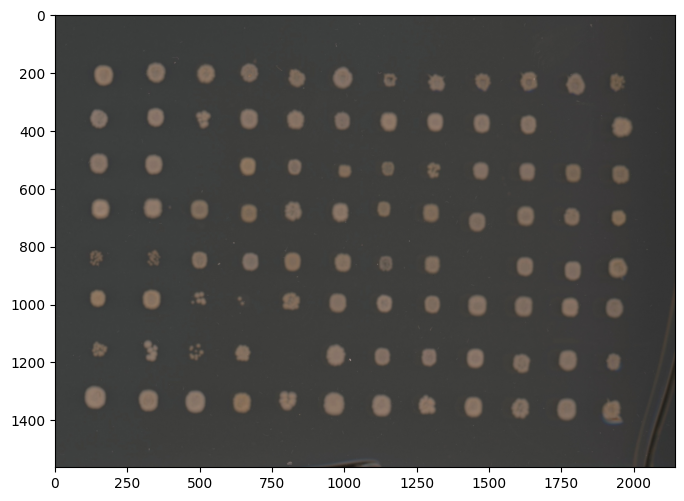

In [2]:

# We're gonna import the last image in the dataset, lets make an image with a grid in 96 array format
# Accepted filepaths are jpegs, tiffs, pngs, and RAW format files
image = pht.GridImage.imread(filepaths[-1], nrows=8, ncols=12)
fig, ax = image.show()
fig.show()


You can always visualize your image with `Image.show()`. This returns a matplotlib figure and axes object, but should plot the figures inside a jupyter notebook. The axis labels are the pixel rows and columns that show the size of your photo. If your original input is rgb or grayscale, `Image.show()` will return the original image. To show the grayscale converted version of your image, use `Image.gray.show()`.

## HeavyWatershedPipeline

The HeavyWatershedPipeline consists of the following operations:

/var/folders/78/rnctrlmn5kj996kjnq_mmqlh0000gn/T/ipykernel_33978/3888085164.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


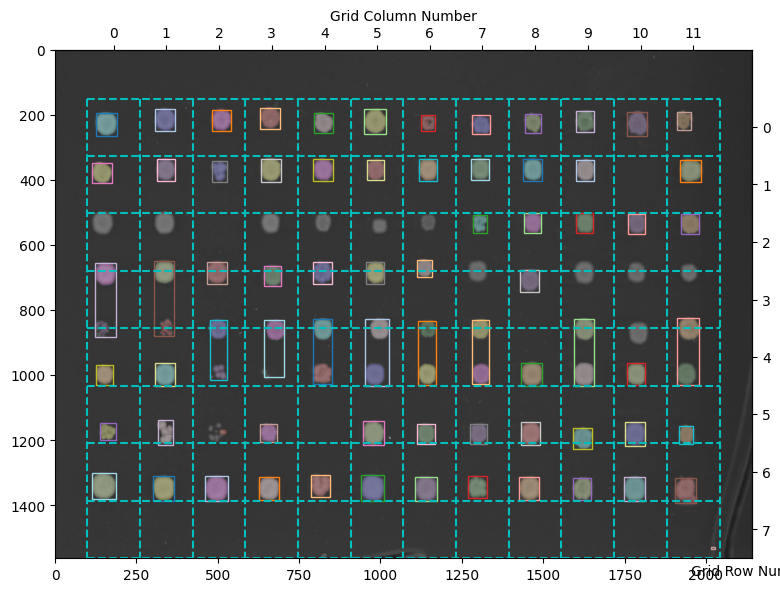

In [3]:
from phenotypic.prefab import HeavyWatershedPipeline

pipe = HeavyWatershedPipeline()

pipe.apply(image, inplace=True)  # we apply the image here
fig, ax = image.show_overlay()
fig.show()


Here the objects with a colored overlay over them represent the different objects detected in your image. The boxes show the objects belonging to a specific grid section. The `HeavyWatershedPipeline` takes steps to ensure only one object in each section remains for downstream analysis. In reality, more objects were probably detected, but the refinement steps removed them according tos trict filters

In [4]:
meas = pipe.measure(image)
meas.head()


,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,8,GridImage,b'',6_1S_8,1,209.575194,660.441027,178,631,243,...,0.313725,0.443137,0.453697,0.466667,0.478431,0.607843,0.040434,0.089150,6.152703,6.242224
1,8,GridImage,b'',6_1S_8,2,215.519171,337.578529,181,306,251,...,0.325490,0.454902,0.478595,0.498039,0.517647,0.552941,0.052432,0.109585,6.451441,6.766552
2,8,GridImage,b'',6_1S_8,3,220.944620,983.140295,183,950,258,...,0.317647,0.458824,0.479938,0.498039,0.513725,0.533333,0.045655,0.095152,5.948025,5.956704
3,8,GridImage,b'',6_1S_8,4,216.277621,510.451017,184,481,250,...,0.313725,0.447059,0.480056,0.501961,0.525490,0.552941,0.056102,0.116902,7.394326,7.724411
4,8,GridImage,b'',6_1S_8,5,219.696510,1627.687698,188,1600,252,...,0.313725,0.427451,0.452016,0.462745,0.482353,0.756863,0.040492,0.089612,7.288871,7.626104


# Processing lots of images

In [5]:
import pandas as pd
from tqdm import tqdm

batch_meas = []

# We use tqdm as a counter
# We only process 3 images for this demo
for image_path in tqdm(filepaths[:2], desc="Images", total=2):
    curr_image = pht.GridImage.imread(image_path, nrows=8, ncols=12)

    # This applies the operations and measurements at the same time
    curr_meas = pipe.apply_and_measure(curr_image, inplace=True)
    batch_meas.append(curr_meas)
batch_meas = pd.concat(batch_meas, axis=0)
batch_meas.head()


Images: 100%|██████████| 2/2 [01:28<00:00, 44.47s/it]


,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,8,GridImage,b'',2_1S_5,1,143.067464,639.386603,116,616,171,...,0.258824,0.290196,0.308149,0.309804,0.325490,0.360784,0.020973,0.068093,2.324545,2.412023
1,8,GridImage,b'',2_1S_5,2,150.576361,489.569862,122,465,182,...,0.219608,0.352941,0.377909,0.392157,0.415686,0.450980,0.049695,0.131553,2.861551,3.057672
2,8,GridImage,b'',2_1S_5,3,152.523276,962.444872,122,935,185,...,0.262745,0.388235,0.404418,0.419608,0.439216,0.470588,0.046826,0.115827,3.028637,3.214263
3,8,GridImage,b'',2_1S_5,4,153.018775,1611.383893,125,1590,183,...,0.258824,0.360784,0.389415,0.400000,0.427451,0.466667,0.045290,0.116360,4.113942,4.538226
4,8,GridImage,b'',2_1S_5,5,156.527308,802.681972,129,780,185,...,0.254902,0.360784,0.381683,0.396078,0.415686,0.439216,0.043488,0.113993,2.941253,3.139710


## Processing images in parallel

**Roadmap Update:** PhenoTypic has plans to incorporate native parallelization and processing to make this more inuitive in the future!

In [6]:
from typing import Iterator
import pandas as pd
from joblib import Parallel, delayed


# We use a generator function to prevent loading too many images into memory
def image_iterator() -> Iterator[pht.GridImage]:
    for image_path in filepaths[:]:
        yield pht.GridImage.imread(image_path, nrows=8, ncols=12)


batch_meas = Parallel(n_jobs=-1)(
        delayed(pipe.apply_and_measure)(image, inplace=False, reset=True)
        for image in image_iterator()
)

batch_meas = pd.concat(batch_meas, axis=0)
batch_meas.head()


,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,8,GridImage,b'',2_1S_5,1,143.067464,639.386603,116,616,171,...,0.258824,0.290196,0.308149,0.309804,0.325490,0.360784,0.020973,0.068093,2.324545,2.412023
1,8,GridImage,b'',2_1S_5,2,150.576361,489.569862,122,465,182,...,0.219608,0.352941,0.377909,0.392157,0.415686,0.450980,0.049695,0.131553,2.861551,3.057672
2,8,GridImage,b'',2_1S_5,3,152.523276,962.444872,122,935,185,...,0.262745,0.388235,0.404418,0.419608,0.439216,0.470588,0.046826,0.115827,3.028637,3.214263
3,8,GridImage,b'',2_1S_5,4,153.018775,1611.383893,125,1590,183,...,0.258824,0.360784,0.389415,0.400000,0.427451,0.466667,0.045290,0.116360,4.113942,4.538226
4,8,GridImage,b'',2_1S_5,5,156.527308,802.681972,129,780,185,...,0.254902,0.360784,0.381683,0.396078,0.415686,0.439216,0.043488,0.113993,2.941253,3.139710


## Adding in metadata post-analysis for downstream processing

In [7]:
batch_meas

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,8,GridImage,b'',2_1S_5,1,143.067464,639.386603,116,616,171,...,0.258824,0.290196,0.308149,0.309804,0.325490,0.360784,0.020973,0.068093,2.324545,2.412023
1,8,GridImage,b'',2_1S_5,2,150.576361,489.569862,122,465,182,...,0.219608,0.352941,0.377909,0.392157,0.415686,0.450980,0.049695,0.131553,2.861551,3.057672
2,8,GridImage,b'',2_1S_5,3,152.523276,962.444872,122,935,185,...,0.262745,0.388235,0.404418,0.419608,0.439216,0.470588,0.046826,0.115827,3.028637,3.214263
3,8,GridImage,b'',2_1S_5,4,153.018775,1611.383893,125,1590,183,...,0.258824,0.360784,0.389415,0.400000,0.427451,0.466667,0.045290,0.116360,4.113942,4.538226
4,8,GridImage,b'',2_1S_5,5,156.527308,802.681972,129,780,185,...,0.254902,0.360784,0.381683,0.396078,0.415686,0.439216,0.043488,0.113993,2.941253,3.139710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8,GridImage,b'',6_1S_8,78,1349.176105,1779.903875,1312,1748,1387,...,0.313725,0.450980,0.472685,0.490196,0.501961,0.529412,0.045285,0.095828,6.423200,6.722929
78,8,GridImage,b'',6_1S_8,79,1348.713635,656.666667,1314,627,1384,...,0.333333,0.470588,0.499361,0.521569,0.537255,0.576471,0.055204,0.110580,9.791657,10.369950
79,8,GridImage,b'',6_1S_8,80,1349.042947,1619.845455,1315,1590,1384,...,0.325490,0.443137,0.465541,0.478431,0.498039,0.529412,0.040998,0.088092,6.554458,6.770689
80,8,GridImage,b'',6_1S_8,81,1355.120409,1937.399790,1316,1905,1393,...,0.309804,0.411765,0.447029,0.458824,0.482353,0.529412,0.044070,0.098610,7.689996,8.126876


In [8]:
# The original naming rule for this data was "{Time}_{PlateSet}{Media}_{Replicate}"
# Based on this naming rule, let's add the remaining metadata
# We split the ImageName using string and then unpack that into three new columns in the dataframe
batch_meas[["Metadata_Time", "Metadata_SetMedia", "Metadata_Replicate"]] = \
    batch_meas["Metadata_ImageName"].str.split("_", expand=True)

# This was the original naming rule, but it leads to some awkward splitting. It's usually better to separate independent variables with underscores and related variables with dashes. Lets now split the {PlateSet}{Media} into different columns too
batch_meas[["Metadata_PlateSet", "Metadata_Media"]] = batch_meas["Metadata_SetMedia"].str.split("", expand=True)[[1, 2]]

# Time is a number, but because we split it from its name we need to convert it to the proper datatype
batch_meas["Metadata_Time"] = batch_meas["Metadata_Time"].astype(int)
batch_meas["Metadata_PlateSet"] = batch_meas["Metadata_PlateSet"].astype(int)

# Lets see our newest changes
batch_meas[["Metadata_ImageName", "Metadata_Time", "Metadata_PlateSet", "Metadata_Media", "Metadata_Replicate"]].head()

,Metadata_ImageName,Metadata_Time,Metadata_PlateSet,Metadata_Media,Metadata_Replicate
0,2_1S_5,2,1,S,5
1,2_1S_5,2,1,S,5
2,2_1S_5,2,1,S,5
3,2_1S_5,2,1,S,5
4,2_1S_5,2,1,S,5


## Adding in metadata like strain name

To add in metadata like the strain name for each column to your data, we'll use pandas dataframe table joining.



In [9]:
# Lets generate a synthetic table of strain names
import pandas as pd

# It's important to use the same names as the measurement dataframe
synth_names = pd.DataFrame(data={
    "Metadata_PlateSet"  : 1,
    "Grid_SectionNum"    : range(96),
    "Metadata_StrainName": [f"SYNTH-{idx:02d}" for idx in range(96)],
})

synth_names

,Metadata_PlateSet,Grid_SectionNum,Metadata_StrainName
0,1,0,SYNTH-00
1,1,1,SYNTH-01
2,1,2,SYNTH-02
3,1,3,SYNTH-03
4,1,4,SYNTH-04
...,...,...,...
91,1,91,SYNTH-91
92,1,92,SYNTH-92
93,1,93,SYNTH-93
94,1,94,SYNTH-94


In [10]:
meas = batch_meas.merge(synth_names, on=["Metadata_PlateSet", "Grid_SectionNum"], how="inner")
meas[["Metadata_PlateSet", "Grid_SectionNum", "Metadata_StrainName", "Shape_Area"]].head()

,Metadata_PlateSet,Grid_SectionNum,Metadata_StrainName,Shape_Area
0,1,3,SYNTH-03,2090.0
1,1,2,SYNTH-02,2462.0
2,1,5,SYNTH-05,2857.0
3,1,9,SYNTH-09,2024.0
4,1,4,SYNTH-04,2069.0


We'll use this data in the {doc} `GrowthCurves`.